Computer Vision Object Dectection
Computer Vision API를 사용해서 이미지속에 있는 사물을 인식하는 데모 입니다.

네트워크 통신을 위해서 requests 패키지를 import 합니다.

In [ ]:
import requests #요청보내는 패키지

이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.

matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.

In [ ]:
import matplotlib.pyplot as plt #선을 그리기 위함
from PIL import Image #이미지 패키지
from io import BytesIO #바이너리로 표현하기 위함

In [ ]:
import json

Subscription Key와 접속에 필요한 URL을 설정합니다.

In [ ]:
subscription_key = '******************'
vision_base_url = 'https://******************.cognitiveservices.azure.com/vision/v2.0/'

분석에 사용되는 이미지를 확인합니다.

In [ ]:
analyze_url = vision_base_url + 'analyze' #이제 이 url은 이미지 분석을 위한 도구

In [ ]:
image_url = 'https://a.travel-assets.com/findyours-php/viewfinder/images/res70/30000/30252-Myeongdong.jpg?impolicy=fcrop&w=1040&h=580&q=mediumHigh'
con = requests.get(image_url).content
byte = BytesIO(con) #이미지를 바이너리로 변경
image = Image.open(byte) #이미지 가져오기

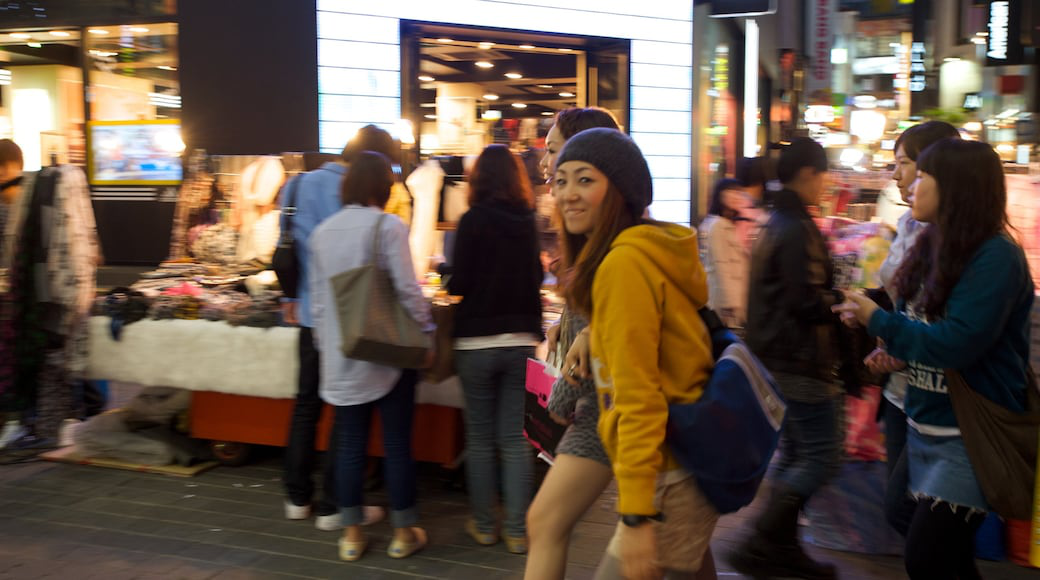

In [ ]:
image

In [ ]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params  = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}

In [ ]:
response = requests.post(analyze_url, headers = headers, params = params, json = data) #웹에서 호출할 때 : get or post

In [ ]:
result = response.json()

In [ ]:
result

{'categories': [{'name': 'people_many', 'score': 0.47265625}],
 'color': {'dominantColorForeground': 'Brown',
  'dominantColorBackground': 'Black',
  'dominantColors': ['Black', 'Brown'],
  'accentColor': 'A57026',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['person',
   'building',
   'people',
   'group',
   'woman',
   'standing',
   'walking',
   'busy',
   'street',
   'man',
   'city',
   'young',
   'riding',
   'crowded',
   'crowd',
   'bus',
   'board',
   'train',
   'station'],
  'captions': [{'text': 'a group of people walking down a street',
    'confidence': 0.9681119366202784}]},
 'requestId': 'c5e0cf99-57d1-434c-9120-82cf33c9e71b',
 'metadata': {'height': 580, 'width': 1040, 'format': 'Jpeg'}}

###위의 자료 뽑아내기
[]는 여러개의 개체
{}는 하나의 개체

In [ ]:
image_caption = result['description']['captions'][0]['text']

In [ ]:
image_caption

'a group of people walking down a street'

Object Detection

In [ ]:
objectDetection_url = vision_base_url + 'detect'

In [ ]:
image_url = 'https://dimg.donga.com/ugc/CDB/29STREET/Article/5e/c6/3a/e5/5ec63ae51dfad2738275.jpg'

In [ ]:
image = Image.open(BytesIO(requests.get(image_url).content))

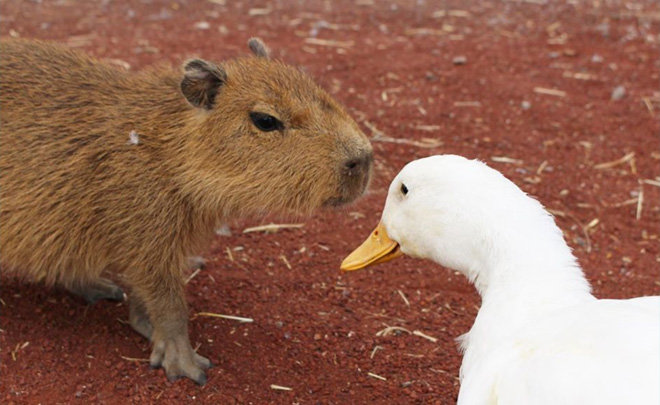

In [ ]:
image

In [ ]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params  = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}

In [ ]:
response = requests.post(objectDetection_url, headers = headers, params=params, json=data)

In [ ]:
result = response.json()
result

{'objects': [{'rectangle': {'x': 0, 'y': 22, 'w': 397, 'h': 369},
   'object': 'rodent',
   'confidence': 0.507,
   'parent': {'object': 'mammal',
    'confidence': 0.95,
    'parent': {'object': 'animal', 'confidence': 0.962}}},
  {'rectangle': {'x': 336, 'y': 148, 'w': 324, 'h': 256},
   'object': 'bird',
   'confidence': 0.923,
   'parent': {'object': 'animal', 'confidence': 0.927}}],
 'requestId': '7ebea710-b890-4ce1-9a8e-00bc541b04fa',
 'metadata': {'height': 405, 'width': 660, 'format': 'Jpeg'}}

In [ ]:
from PIL import Image, ImageDraw, ImageFont
draw = ImageDraw.Draw(image) #ImageDraw는 위에서 불러온 패키지 이름

In [ ]:
#boundingBox를 위한 함수
def DrawBox(detectData):
  objects = detectData['objects'] #결과값 저장
  for obj in objects:
    #print(obj)

    rect = obj['rectangle']
    print(rect)

    x= rect['x']
    y= rect['y']
    w= rect['w']
    h= rect['h']

    #사각형을 만들기 위해 draw객체
    draw.rectangle(((x,y),(x+w,y+h)),outline='red') #outline: 선 색깔
    objectName = obj['object']
    draw.text((x,y),objectName,fill='red')


In [ ]:
DrawBox(result)

{'x': 0, 'y': 22, 'w': 397, 'h': 369}
{'x': 336, 'y': 148, 'w': 324, 'h': 256}


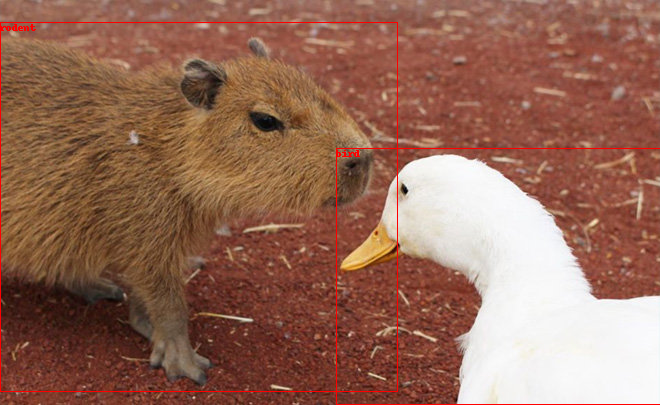

In [ ]:
image